<img src="https://i.imgur.com/12tfKrD.png" alt="Alin">
</img>


# Demo RNN -- 張愛玲散文集AI二次創作

資料集: 張愛玲繁體中文小說 《傳奇》

爬蟲來源: [crawl_book](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)

程式碼參考: [Tensorflow](https://www.tensorflow.org/tutorials/text/text_generation)

本次資料集，著作權乃是張愛玲女士所擁有。**請勿將本次資料集散播、更改、用於非商業用途**。

> **資料集說明**

今年是張愛玲女士101年誕辰。張愛玲出生名門，曾就讀於香港大學和聖約翰大學，受過良好的中西教育。上海淪陷時期，陸續發表《沉香屑·第一爐香》、《傾城之戀》、《心經》、《金鎖記》等中、短篇小說，震動上海文壇。

這次訓練取張愛玲散文集《傳奇》作為訓練，《傳奇》收留五篇散文: 「留情」、「鴻鸞禧」、「紅玫瑰與白玫瑰」、「等」、「桂花蒸阿小悲秋」。其中以「紅玫瑰與白玫瑰」最為膾炙人口。

> **訓練步驟**

深度學習在訓練模型上有以下幾個重要的步驟:
1. 讀入相關封包
2. 取得資料集 
3. 資料前處理
4. 建立模型
5. 制定訓練計畫
6. 評估模型
7. 做預測

> **本次模型介紹 RNN**

![](https://i.imgur.com/FaY50C8.png)


我們來看看維度，很多人會搞不懂RNN的維度:

一個Seq通過RNN後的維度

* Input: (Seq,${originDim}$)
* RNN Neuron: 2048
* Output: (Seq,2048) if (return_sequence == True) else (1,2048)
![](https://i.imgur.com/9SVl6JR.png)

![](https://i.imgur.com/z4ElFIr.png)

> **把生成問題變成分類問題**

![](https://i.imgur.com/TBHKuf6.png)


In [ ]:
# ****************************************
# **請勿將本次資料集散播、用於非學術用途**
# ****************************************

# 執行即代表同意將會合法、合理使用資料集
# 太多人同時存取可能會報cannot retrieve file error
# 點擊you may still be able to access 下面那個連結再自行上傳檔案即可

# !gdown --id 1gMpt0CdlPjr1cR3HwDqumeKaucrSYhhe --output "./Eileen_Legendary.txt"

# !wget -O Eileen_Legendary.txt "http://140.115.82.54/NN/Recurrent/Eileen_Legendary.txt"

## 1. 讀入Package

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

## 2. 取得資料集

In [ ]:
# 作業之一就是試試看其他本小說

book = ""
with open("./harry1.txt","r",encoding="utf8") as file:
  for line in file:
    book += line
with open("./harry2.txt","r",encoding="utf8") as file:
  for line in file:
    book += line
with open("./harry3.txt","r",encoding="utf8") as file:
  for line in file:
    book += line
#跑太久了 一回合就要10分鐘
# with open("./harry4.txt","r",encoding="utf8") as file:
#   for line in file:
#     book += line
# with open("./harry5.txt","r",encoding="utf8") as file:
#   for line in file:
#     book += line
# with open("./harry6.txt","r",encoding="utf8") as file:
#   for line in file:
#     book += line
# with open("./harry7.txt","r",encoding="utf8") as file:
#   for line in file:
#     book += line

book_length = len(book)
unique_words = set(book)
print(f"哈利波特(全)共有 {book_length} 字詞")
print(f"包含了 {len(unique_words)} 個獨一無二的字 (含標點符號)\n")
print(book[0:500])

哈利波特(全)共有 538620 字詞
包含了 3465 個獨一無二的字 (含標點符號)

第１章 大難不死的男孩
家住水蠟樹街四號的德思禮夫婦總是得意地說他們是非常規矩的人家。拜託，拜託了。他們從來跟神秘古怪的事不沾邊，因為他們根本不相信那些邪門歪道。
威農德思禮先生在一家名叫格朗寧的公司做主管，公司生產鑽機。他高大魁梧，胖得幾乎連脖子都沒了，卻蓄著一臉大鬍子。德思禮太太是個瘦削的金髮女人。她的脖子幾乎比正常人長一倍。這樣每當她花許多時間隔著籬牆引頸而望、窺探左鄰右舍時，她的長脖子可就派上了大用場。德思禮夫婦有一個小兒子，名叫達力。在他們看來，人世間沒有比達力更好的孩子了。
德思禮一家什麼都不缺，但他們擁有一個秘密，他們最害怕的就是這秘密會被人發現。他們想，一旦有人發現波特一家的事，他們會承受不住的。波特太太是德思禮太太的妹妹，不過她們已經有好幾年不見面了。實際上，德思禮太太佯裝自己根本沒有這麼個妹妹，因為她妹妹和她那一無是處的妹夫與德思禮一家的為人處世完全不一樣。一想到鄰居們會說波特夫婦來到了，德思禮夫婦會嚇得膽顫心驚。他們知道波特也有個兒子，只是他們從來沒有見過。這孩子也是他們不與波特夫婦來往的一個很好的藉口，他們不願讓達力跟這種孩子廝混。
我們的故事開始於一個晦暗、陰


## 3. 資料前處理

文字前處理有一堆方法、作法:
* 切字
* 還原
* 清除特殊字符
* 清除不常見字符 (StopWord)


我這裡僅使用去除不常見的字(StopWord)

In [ ]:
# 計算字數統計
words_count = {}
for w in book:
  if w in words_count:
    words_count[w] += 1
  else:
    words_count[w] = 1

words_count = sorted(words_count.items(),key=lambda x:x[1])

In [ ]:
stop_word = 8
unique_words = [w_tup[0] for w_tup in words_count if w_tup[1]>stop_word]
print(f"去除次數小於{stop_word}的文字剩餘 : {len(unique_words)}")

去除次數小於8的文字剩餘 : 2150


In [ ]:
print(f"原本哈利波特(全)共有 {book_length} 字詞")
print(f"去除不常出現的文字後")
book = [w for w in book if w in unique_words]
print(f"剩餘{len(book)}個字")

原本哈利波特(全)共有 538620 字詞
去除不常出現的文字後
剩餘534283個字


In [ ]:
# 文字轉數字(index)
word_2_index = {word:index for index,word in enumerate(unique_words)}
index_2_word = {word_2_index[word]:word for word in word_2_index}

book_2_index = [word_2_index[w] for w in book]

print("原始文字 : ")
print(book[:40])
print("-"*40)
print("轉成index : ")
print({word_2_index[w] for w in book[:40]})

原始文字 : 
['第', '章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的', '德', '思', '禮', '夫', '婦', '總', '是', '得', '意', '地', '說', '他', '們', '是', '非', '常', '規', '矩', '的', '人']
----------------------------------------
轉成index : 
{1793, 1923, 1413, 1927, 1568, 1186, 1454, 1716, 1719, 1852, 1853, 2109, 1215, 2111, 70, 2118, 1993, 1354, 2131, 2133, 2134, 1879, 2139, 2140, 2145, 1250, 2147, 1890, 2146, 1899, 2029, 2030, 1775, 2032, 1783, 1916, 1790}


In [ ]:
def ind2word_seq(seq):
  return [index_2_word[i] for i in seq]

In [ ]:
# 設定輸入模型長度
seq_len = 20
characters = tf.data.Dataset.from_tensor_slices(book_2_index)
# characters = characters.map(lambda w:word_2_index[w.item()])

sequences = characters.batch(seq_len+1,drop_remainder=True)

for seq in sequences.take(2):
  print(seq.shape)
  print(seq)
  print([index_2_word[i] for i in seq.numpy()])

(21,)
tf.Tensor(
[1923 1413 1568 2111 1793 2140 1916 2147 1790 1719 2145 2029 2030 1879
 1215 1775 1454 1852 1250 2147 1853], shape=(21,), dtype=int32)
['第', '章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的', '德']
(21,)
tf.Tensor(
[1927 1890 1993 1354 1716 2139 2109 2032 2131 2134 2146 2133 2139 1783
 1899 1186   70 2147 2118 2029 2148], shape=(21,), dtype=int32)
['思', '禮', '夫', '婦', '總', '是', '得', '意', '地', '說', '他', '們', '是', '非', '常', '規', '矩', '的', '人', '家', '。']


![](https://i.imgur.com/YMVMFEJ.png)


In [ ]:
# 做input、target切割
def split_input_target(seq):
  input_txt = seq[:-1]
  target_txt = seq[1:]
  return input_txt,target_txt

split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

![](https://i.imgur.com/YoHWLkf.png)


In [ ]:
dataset = sequences.map(split_input_target)

for input_example,target_exaple in dataset.take(1):
  print("Input :", ind2word_seq(input_example.numpy()))
  print("Target:", ind2word_seq(target_exaple.numpy()))
  print("-"*50)
  print("Input :", input_example.numpy())
  print("Target:", target_exaple.numpy())

Input : ['第', '章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的']
Target: ['章', ' ', '大', '難', '不', '死', '的', '男', '孩', '\n', '家', '住', '水', '蠟', '樹', '街', '四', '號', '的', '德']
--------------------------------------------------
Input : [1923 1413 1568 2111 1793 2140 1916 2147 1790 1719 2145 2029 2030 1879
 1215 1775 1454 1852 1250 2147]
Target: [1413 1568 2111 1793 2140 1916 2147 1790 1719 2145 2029 2030 1879 1215
 1775 1454 1852 1250 2147 1853]


In [ ]:
# 建立資料集
# Batch size
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True))

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 20), dtype=tf.int32, name=None), TensorSpec(shape=(64, 20), dtype=tf.int32, name=None))>

## 4. 建立模型

![](https://i.imgur.com/TBHKuf6.png)

In [ ]:
# 超參數
EMBEDDING_DIM = 512

# 使用 keras 建立一個非常簡單的 LSTM 模型
model = tf.keras.Sequential()

model.add(
  tf.keras.layers.Embedding(
    input_dim=len(unique_words), 
    output_dim=EMBEDDING_DIM
))

model.add(
  tf.keras.layers.LSTM(
    units=4096, 
    return_sequences=True, 
))

model.add(
  tf.keras.layers.LSTM(
    units=2048, 
    return_sequences=True,
))
  
model.add(
  tf.keras.layers.Dense(
      len(unique_words),activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 512)         1100800   
                                                                 
 lstm_6 (LSTM)               (None, None, 4096)        75513856  
                                                                 
 lstm_7 (LSTM)               (None, None, 2048)        50339840  
                                                                 
 dense_3 (Dense)             (None, None, 2150)        4405350   
                                                                 
Total params: 131,359,846
Trainable params: 131,359,846
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 查看模型的輸入、輸出 shape
for input_example,target_exaple in dataset.take(1):
  predict_example = model(input_example)
  print(f"Model input shape : {input_example.shape}")
  print(f"Model output shape : {predict_example.shape}")
  print(f"Model target shape : {target_exaple.shape}")

Model input shape : (64, 20)
Model output shape : (64, 20, 2150)
Model target shape : (64, 20)


In [ ]:
print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入尚未訓練的model後獲得：")
print()

predict_words = tf.math.argmax(predict_example[0],-1)
[print(index_2_word[ind],end="") for ind in predict_words.numpy()]
print()

原本的中文字序列：
看我種的東西吧。」哈利和妙麗喝完茶之後，
----------------------------------------
輸入尚未訓練的model後獲得：

爸兜束板笨專郵郵號號百百百氛氛氛解解氛滅


## 5. 制定訓練計畫並訓練

* [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy) V.S. [categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy)

```python=
# categorical_crossentropy
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

# sparse_categorical_crossentropy
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

```


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam")

In [ ]:
EPOCHS = 20
history = model.fit(
    dataset, # 前面使用 tf.data 建構的資料集
    epochs=EPOCHS,
)
#run 1hr

Epoch 1/20
397/397 [==============================] - 153s 385ms/step - loss: 4.5301
Epoch 2/20
397/397 [==============================] - 153s 385ms/step - loss: 4.0054
Epoch 3/20
397/397 [==============================] - 153s 385ms/step - loss: 3.6993
Epoch 4/20
397/397 [==============================] - 153s 385ms/step - loss: 3.4724
Epoch 5/20
397/397 [==============================] - 153s 385ms/step - loss: 3.2770
Epoch 6/20
397/397 [==============================] - 153s 385ms/step - loss: 3.0884
Epoch 7/20
397/397 [==============================] - 153s 385ms/step - loss: 2.8962
Epoch 8/20
397/397 [==============================] - 153s 385ms/step - loss: 2.6882
Epoch 9/20
397/397 [==============================] - 153s 384ms/step - loss: 2.4578
Epoch 10/20
397/397 [==============================] - 153s 385ms/step - loss: 2.2009
Epoch 11/20
397/397 [==============================] - 153s 385ms/step - loss: 1.9205
Epoch 12/20
397/397 [==============================] - 153s 384

## 6. 衡量模型

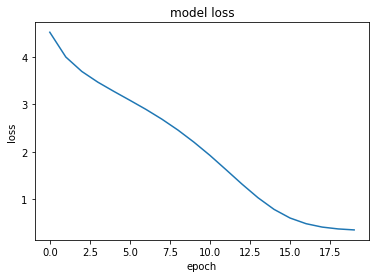

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
after_train_predictions = model(input_example)
after_sampled_indices = tf.argmax(after_train_predictions[0],1)

print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入進訓練後的model後獲得：")
print()

[print(index_2_word[ind],end="") for ind in after_sampled_indices.numpy()]
print()

原本的中文字序列：
看我種的東西吧。」哈利和妙麗喝完茶之後，
----------------------------------------
輸入進訓練後的model後獲得：

到種的東西吧。」哈利和妙麗喝完茶之後，海


## 7. 做預測

![](https://i.imgur.com/YsOj6Mw.png)

在實際生成文字時，我們會想要增加一些隨機性。比如”天天出去” 不加入隨機 “天天天天” 如果我們全部輸出的字都是取softmax最大可能性，則一個訓練完美的model會把整本書給輸出出來。但是我們要的是，希望電腦在最大可能性的幾個字中隨機挑選一個字出來。

tf.random.categorical 會根據softmax機率後隨機挑選字，但是我們不希望因為模型很爛導致不合理的字被選中，因此我們會除上一個temperature來增加可能字的比重。

EX: "天天出去" 預測下一個字
1. 玩 : 0.3 
2. 天 : 0.1 
3. 浪 : 0.4 

"天"有的機率被印出，我們不希望。所以我們可以在每一個機率除上一個temperature(0.01)
1. 玩 : 30 
2. 天 : 10 
3. 浪 : 40 
原本"浪"跟"天"差0.3，除temperature後差30



In [ ]:
# 預測文字，並把預測文字循環當作下一次的輸入

# 設定你的temperature
temperature = 0.01

def generateWords(input,words=500):
  [print(index_2_word[ind],end="") for ind in input]
  for i in range(words):
    next_input = tf.expand_dims(input,axis=0)
    predicts = model(next_input)
    predicts = predicts[:,-1,:]
    predicts /= temperature
    result = tf.random.categorical(
        predicts,num_samples=1
    )
    chinese_ind = tf.squeeze(result).numpy()
    print(index_2_word[chinese_ind],end="")
    input = input+[chinese_ind]
    input = input[-seq_len:]

In [ ]:
init_seq = "哈利波特"
init_seq_ind = [word_2_index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

generateWords(input,500)

哈利波特在這個隔間裡。這麼說，那就是你了。」
哈利本來是被施入魔法的重新功，但他已經在威農姨丈和佩妮阿姨和達力還在窗口呆呆地探身出來。
「那……這樣……」
哈利在黑魔法防禦術課上空中不見，感到有些作嘔。
「我可以把這個告訴你們的！」他脫口而出。
「你柴的是什麼？」哈利問。
「爬說嘴！」
「我們可以開車飛到霍格華茲，」麥教授說，「你一直在聽著，我想你要和魔法石從古靈閣轉過來到這裡，你怎麼能夠同時上好幾門課了，但是，他們看到她在中間做的。
他們去上第一節課了，禮堂開始空下來。
「它要是有一個大傻瓜，」他說，「希望讓那些催狂魔去對付我。」
「是啊，」哈利痛苦地說，「只要她對一個催狂魔來試試而且，我想你們倆大概是要到了。你們可以這樣做的時候，有一天會給你惹多好。」
「我隨時都能看見。」妙麗低聲說。
「你在說些什麼呀？」哈利說。
「日記，麥教授。」
「我想是什麼事？」哈利說。
「你的雙親。」路平說。
「你不能帶走鄧不利多！」妙麗說，聲音低得嚴肅，「我們認為他在追捕我。
要是我們成功嗎？」
「就來了，」哈利說，「可是您不能帶走他們……」
「我們不能再多一條臂膀，馬份，」哈利說，「你們倆都是見過的。」
「我

In [ ]:
# 不要執行這一個block
# import time
# while True:
#   time.sleep(5)
#   pass

## 作業2.1 (30%)

使用[爬蟲程式](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)來取得一個新的文本資料集，或是不管你從哪裡取得的資料集也可以(不要再張愛玲了，不限中英文)。然後丟入這個模型來看看AI生成文字的成果，將**結果**與**你的心得**(不是機器產生的心得)，貼上pdf。

請隨意修改本colab的模型與參數來達到更好的結果。

資料集越有趣越好，比如你可以去爬PTT文章來製作廢文產生器。去爬Dcard製作幻想文產生器。

In [ ]:
#作業如上